In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Retorn la matriz de confusión en orden Jaime.
def cMat(yreal,ypred):
    return np.flipud(np.fliplr(confusion_matrix(yreal ,ypred ).T)) 

In [31]:
data = pd.read_csv('Default.csv')
income = data['income']
balance = data['balance']
default = data['default']
student0 = data['student']
student = np.zeros_like(balance)
study = (student0 =='Yes')
student[study] = 1
dno = (default == 'No')
dnno = (default == 'Yes')

X = np.array([income,balance,student]).T
y = default


In [140]:
p0 = 0.2
punto1 = lda(solver = 'lsqr')
#punto1.scalings_=[p0,1-p0]
punto1.fit(X,y)
x = np.linspace(1E-3,0.8,50)
sampleWeight = np.zeros(len(x))
rate =np.zeros(len(x))
rate2 =np.zeros(len(x))
rocY =np.zeros(len(x))
rocX =np.zeros(len(x))
precision =np.zeros(len(x))
recall =np.zeros(len(x))
truePositive =np.zeros(len(x))
densidadProb = punto1.predict_proba(X)[:,1]
ypredicted = np.copy(y)
for i in range(len(x)):
    pertenece = (densidadProb > x[i])
    ypredicted[pertenece] = 'Yes'
    ypredicted[np.logical_not( pertenece )] = 'No'
    #solv = lda(solver = 'lsqr', priors=[x[i],1-x[i]]).fit(X,y)
    #sampleWeight[i] = (1-solv.score(X,y))**2
    sampleWeight[i] = (1-accuracy_score(y,ypredicted))
    solv = lda(solver = 'lsqr').fit(X,y)
    
    confus = cMat(y,ypredicted)
    #print(i)
    #print(confus)
    rate[i] = confus[1][0]/(confus[0][0]+confus[1][0])
    rate2[i] = confus[0][1]/(confus[1][1]+confus[0][1])
    rocX[i] = confus[0][1]/(confus[1][1]+confus[0][1])
    rocY[i] = confus[0][0]/(confus[0][0]+confus[1][0])
    recall[i] = confus[1][1]/(confus[1][1]+confus[1][0])
    precision[i] = confus[1][1]/(confus[1][1]+confus[0][1])
    

#print(1-punto1.score(X,y,sample_weight=sampleWeight))
print(1-punto1.score(X,y))
#ytest = np.copy(y)
#ytest[prediction] = 'Yes'
#ytest[np.logical_not(prediction)] = 'No'
p1y = punto1.predict(X)
print(cMat(y,p1y))

0.02749999999999997
[[  80   22]
 [ 253 9645]]


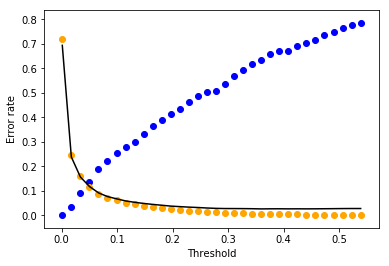

In [141]:
hasta = (x<= 0.55)
plt.plot(x[hasta],sampleWeight[hasta], color = 'black')
plt.scatter(x[hasta],rate[hasta], color = 'blue')
plt.scatter(x[hasta],rate2[hasta], color = 'orange')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.savefig('f47.png')

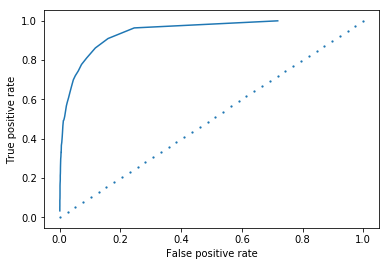

In [149]:
rocx0 = np.linspace(0,1,40)
plt.plot(rocX,rocY)
plt.scatter(rocx0,rocx0, s = 1.5)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.savefig('f48.png')

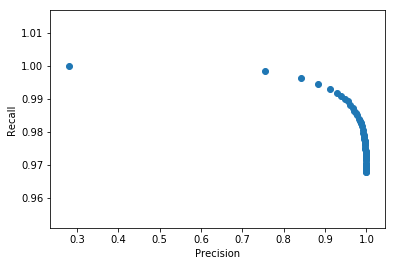

In [150]:
rocx0 = np.linspace(0,max(rocX),40)
#plt.plot(rocX,rocY)
plt.scatter(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.savefig("prec-recall.png")

In [151]:
!wget https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv


--2018-10-12 07:53:01--  https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv
Resolving vincentarelbundock.github.io (vincentarelbundock.github.io)... 185.199.110.153, 185.199.109.153, 185.199.108.153, ...
Connecting to vincentarelbundock.github.io (vincentarelbundock.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37658 (37K) [text/csv]
Saving to: ‘Boston.csv’

Boston.csv          100%[===================>]  36,78K   222KB/s    in 0,2s    

2018-10-12 07:53:02 (222 KB/s) - ‘Boston.csv’ saved [37658/37658]

